In [1]:
import matplotlib as mpl

mpl.use("pgf")

#import matplotlib.font_manager as fm

#fp1 = fm.FontProperties(fname='/usr/share/fonts/opentype/linux-libertine/LinLibertine_DR.otf')

## TeX preamble
#pgf_with_pdflatex = {
#    "font.family": "serif",
#    "text.usetex": True,
#    "text.latex.unicode": True,
#    "pgf.texsystem": "pdflatex",
#    "pgf.preamble": [
#         r"\usepackage[utf8x]{inputenc}",
#         r"\usepackage[T1]{fontenc}",
#         r"\usepackage[]{libertine}"
#         r"\usepackage[libertine]{newtxmath}"
#         ]
#}
#mpl.rcParams.update(pgf_with_pdflatex)

mpl.rcParams['font.family'] = 'Libertine'

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Linux Libertine']})

import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='/usr/share/fonts/opentype/linux-libertine/LinLibertine_DR.otf')

rc('text.latex', preamble=[r'\usepackage[utf8x]{inputenc}',r'\usepackage[T1]{fontenc}',r'\usepackage{libertine}',r'\usepackage[libertine]{newtxmath}'])

In [11]:
import sys
sys.path.insert(0,'../../')
sys.path.insert(0,'../')

import numpy as np
#from select_lcss import LCSCandidate, Point
from matplotlib import pyplot as plt
plt.rc('text',usetex=True)
plt.rc('figure',figsize=(5.05,3.1),dpi=100)
#plt.rc('text.latex',preamble=[r'\usepackage[]{libertine}',r'\usepackage[libertine]{newtxmath}'])
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
import time


In [12]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [13]:
import matplotlib as mpl

In [14]:
from select_lcss import Manifold, GeodesicLevelSet, Point, InputManifoldParameters, LCSCandidate

In [15]:
import os

In [26]:
LCSs = np.load('lcss_globalcheck=False.npy')

In [27]:
len(LCSs)

61

In [28]:
np.save('l_x.npy',[l.xs for l in LCSs])
np.save('l_y.npy',[l.ys for l in LCSs])
np.save('l_z.npy',[l.zs for l in LCSs])
np.save('l_t.npy',[l.triangulations for l in LCSs])

In [29]:
LCSs[0].triangulations

[[0, 1, 2],
 [0, 2, 3],
 [0, 3, 4],
 [0, 4, 5],
 [0, 5, 6],
 [0, 6, 7],
 [0, 7, 8],
 [0, 8, 9],
 [0, 9, 10],
 [0, 10, 1],
 [1, 2, 323],
 [1, 11, 323],
 [2, 3, 12],
 [2, 323, 12],
 [3, 4, 324],
 [3, 12, 324],
 [4, 5, 13],
 [4, 324, 13],
 [5, 6, 14],
 [5, 13, 14],
 [6, 7, 325],
 [6, 14, 325],
 [7, 8, 326],
 [7, 325, 326],
 [8, 9, 327],
 [8, 326, 327],
 [9, 10, 328],
 [9, 327, 328],
 [10, 1, 11],
 [10, 328, 11],
 [11, 323, 15],
 [11, 329, 15],
 [323, 12, 330],
 [323, 15, 330],
 [12, 324, 331],
 [12, 330, 331],
 [324, 13, 332],
 [324, 331, 332],
 [13, 14, 333],
 [13, 332, 333],
 [14, 325, 334],
 [14, 333, 334],
 [325, 326, 335],
 [325, 334, 335],
 [326, 327, 16],
 [326, 335, 16],
 [327, 328, 336],
 [327, 16, 336],
 [328, 11, 329],
 [328, 336, 329],
 [329, 15, 17],
 [329, 337, 17],
 [15, 330, 338],
 [15, 17, 338],
 [330, 331, 339],
 [330, 338, 339],
 [331, 332, 18],
 [331, 339, 18],
 [332, 333, 340],
 [332, 18, 340],
 [333, 334, 341],
 [333, 340, 341],
 [334, 335, 342],
 [334, 341, 342],
 [

<IPython.core.display.Javascript object>


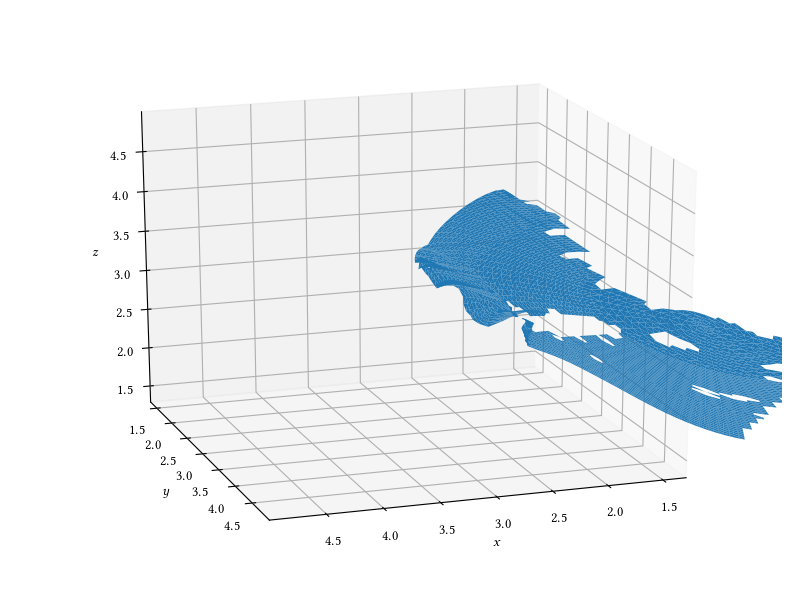

In [30]:
fig = plt.figure(figsize=((8,6)))
ax = fig.add_subplot(111,projection='3d')
#nm = 0
#cmap = mpl.cm.viridis
#norm = mpl.colors.Normalize(vmin = np.log(np.amin(lmi)+1),vmax=np.log(np.amax(lmi)+1))
#cmap = mpl.cm.get_cmap('plasma')
#norm = mpl.colors.Normalize(vmin=lm3_min,vmax=lm3_max)
#nm = 0
#cb1 = mpl.colorbar.ColorbarBase(ax,cmap=cmap,norm=norm)
#cb1.set_label('Hei')
nm = 0
#cmap = cm.veridis(vmin=np.amin(lmi),vmax=np.amax(lmi))
for l in LCSs[nm:nm+1]:
    #col = cmap(np.log(l.avg_lambda3+1),norm=norm)
    #if l.tot_weight > 10:
    #clrval = conv2rgba(l.avg_lambda3)
    #clr = cmap(clrval)
    for t in l.triangulations:
        #tau = np.asarray(t)
        _x = [l.xs[tau] for tau in t]
        _y = [l.ys[tau] for tau in t]
        _z = [l.zs[tau] for tau in t]
        verts = [list(zip(_x,_y,_z))]
        ax.add_collection3d(Poly3DCollection(verts),zs='z')
    #X,Y = np.meshgrid()
    #srf = ax.plot_trisurf(l.xs,l.ys,l.zs,triangles=l.triangulations,alpha=1)#, color = 'steelblue')
    #srf2 = ax.plot_surface(np.asarray(l.xs),np.asarray(l.ys),np.asarray(l.zs))
    #if l.tot_weight > 10:
    #    ax.plot_trisurf(l.xs,l.ys,l.zs,triangles=l.triangulations)
    
#bar = fig.colorbar(srf)
    
ax.set_xlim(0,2*np.pi)
ax.set_ylim(0,2*np.pi)
ax.set_zlim(0,2*np.pi)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

theta = 20
phi = 60

ax.view_init(theta,phi)

plt.tight_layout()

<IPython.core.display.Javascript object>


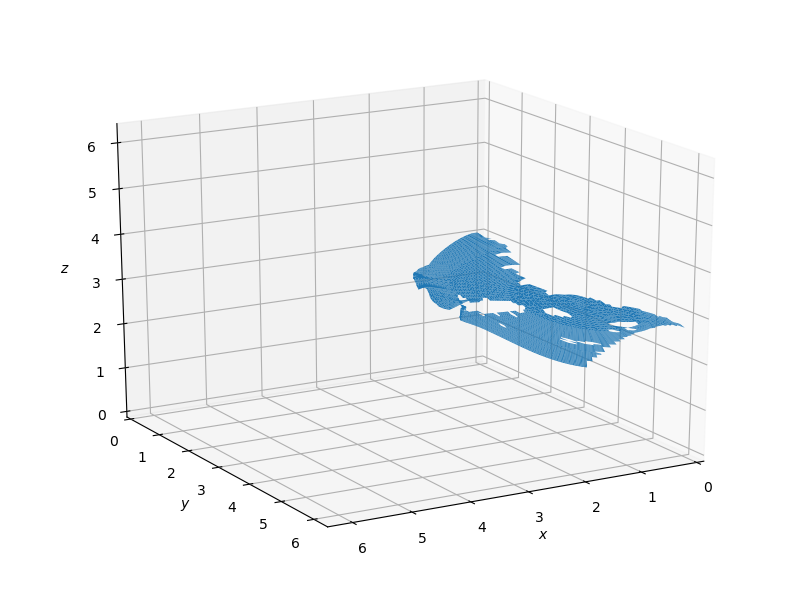

1.702409029006958


In [13]:
t1 = time.time()
fig = plt.figure(figsize=((8,6)))
ax = fig.add_subplot(111,projection='3d')
#nm = 0
#cmap = mpl.cm.viridis
#norm = mpl.colors.Normalize(vmin = np.log(np.amin(lmi)+1),vmax=np.log(np.amax(lmi)+1))
#cmap = mpl.cm.get_cmap('plasma')
#norm = mpl.colors.Normalize(vmin=lm3_min,vmax=lm3_max)
#nm = 0
#cb1 = mpl.colorbar.ColorbarBase(ax,cmap=cmap,norm=norm)
#cb1.set_label('Hei')
nm = 0
#cmap = cm.veridis(vmin=np.amin(lmi),vmax=np.amax(lmi))
for l in LCSs[nm:nm+1]:
    #col = cmap(np.log(l.avg_lambda3+1),norm=norm)
    #if l.tot_weight > 10:
    #clrval = conv2rgba(l.avg_lambda3)
    #clr = cmap(clrval)
    #for t in l.triangulations:
        #tau = np.asarray(t)
    #    _x = [l.xs[tau] for tau in t]
    #    _y = [l.ys[tau] for tau in t]
    #    _z = [l.zs[tau] for tau in t]
    #    verts = [list(zip(_x,_y,_z))]
    #    ax.add_collection3d(Poly3DCollection(verts),zs='z')
    #X,Y = np.meshgrid()
    #srf = ax.plot_trisurf(l.xs,l.ys,l.zs,triangles=l.triangulations,color='red',alpha=0.3)#, color = 'steelblue')
    for t in l.triangulations:
        #tau = np.asarray(t)
        _x = [l.xs[tau] for tau in t]
        _y = [l.ys[tau] for tau in t]
        _z = [l.zs[tau] for tau in t]
        verts = [list(zip(_x,_y,_z))]
        ax.add_collection3d(Poly3DCollection(verts),zs='z')
    #srf2 = ax.plot_surface(np.asarray(l.xs),np.asarray(l.ys),np.asarray(l.zs))
    #if l.tot_weight > 10:
    #    ax.plot_trisurf(l.xs,l.ys,l.zs,triangles=l.triangulations)
    
#bar = fig.colorbar(srf)
    
ax.set_xlim(0,2*np.pi)
ax.set_ylim(0,2*np.pi)
ax.set_zlim(0,2*np.pi)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

theta = 20
phi = 60

ax.view_init(theta,phi)

plt.tight_layout()
print(time.time()-t1)

In [26]:
t

[308, 2238, 2178]

In [14]:
l.xs[tau]

TypeError: only integer scalar arrays can be converted to a scalar index

In [52]:
for l in LCSs[nm:nm+10]:
    print(l.avg_lambda3)

2565260.8584717596


In [26]:
mfs_selfintersectcheck_on = []
num_files = len(next(os.walk('manifolds_nu_cubic_selfintersectcheck=True/'))[2])
for i in range(num_files):
    mfs_selfintersectcheck_on.append(np.load('manifolds_nu_cubic_selfintersectcheck=True/{0:04d}_manifold_m.npy'.format(i))[0])

mfs_selfintersectcheck_off = []
num_files = len(next(os.walk('manifolds_nu_linear_selfintersectcheck=True/'))[2]) 
#num_files = len(next(os.walk('manifolds_nu_cubic_selfintersectcheck=False/'))[2]) 
for i in range(num_files):
    mfs_selfintersectcheck_off.append(np.load('manifolds_nu_linear_selfintersectcheck=True/{0:04d}_manifold_m.npy'.format(i))[0])
    #mfs_selfintersectcheck_off.append(np.load('manifolds_nu_cubic_selfintersectcheck=False/{0:04d}_manifold_m.npy'.format(i))[0])

In [8]:
len(mfs_selfintersectcheck_on)

165

In [8]:
files_old = next(os.walk('manifolds_nu_linear_selfintersectcheck=True/'))[2]

In [9]:
mfs_old = []
for f in files_old:
    mfs_old.append(np.load('manifolds_nu_linear_selfintersectcheck=True/{}'.format(f))[0])

In [10]:
files_new = next(os.walk('manifolds_nu_cubic_selfintersectcheck=True/'))[2]

In [11]:
mfs_new = []
for f in files_new:
    mfs_new.append(np.load('manifolds_nu_cubic_selfintersectcheck=True/{}'.format(f))[0])

In [12]:
dists_1 = [mf.geo_dist for mf in mfs_new]
dists_2 = [mf.geo_dist for mf in mfs_old]

(array([ 2., 14., 24., 28., 18., 29., 33.,  5.,  7.,  5.]),
 array([0.68 , 0.962, 1.244, 1.526, 1.808, 2.09 , 2.372, 2.654, 2.936,
        3.218, 3.5  ]),
 <a list of 10 Patch objects>)

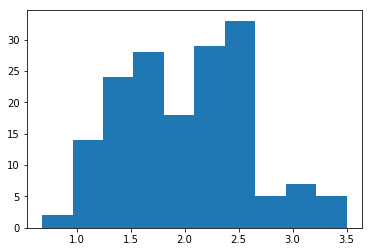

In [13]:
plt.figure()
plt.hist(dists_1)

(array([ 4., 11., 35., 35., 26., 23., 20.,  6.,  3.,  2.]),
 array([0.  , 0.43, 0.86, 1.29, 1.72, 2.15, 2.58, 3.01, 3.44, 3.87, 4.3 ]),
 <a list of 10 Patch objects>)

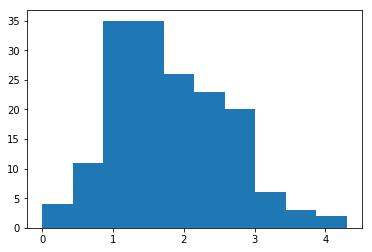

In [14]:
plt.figure()
plt.hist(dists_2)

In [21]:
dists_1 = [mf.geo_dist for mf in mfs_selfintersectcheck_on]
dists_2 = [mf.geo_dist for mf in mfs_selfintersectcheck_off]

<IPython.core.display.Javascript object>


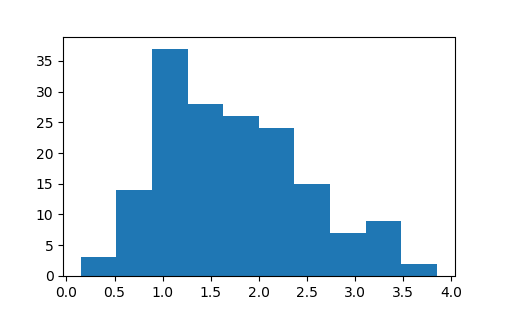

(array([ 3., 14., 37., 28., 26., 24., 15.,  7.,  9.,  2.]),
 array([0.15, 0.52, 0.89, 1.26, 1.63, 2.  , 2.37, 2.74, 3.11, 3.48, 3.85]),
 <a list of 10 Patch objects>)

In [24]:
plt.figure()
plt.hist(dists_1)

<IPython.core.display.Javascript object>


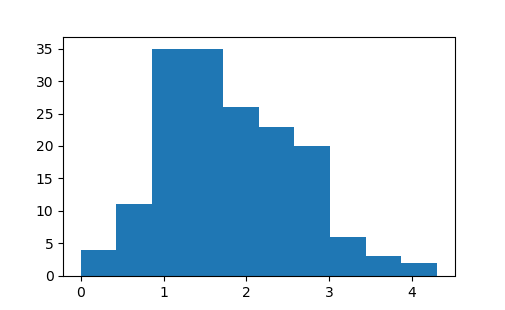

(array([ 4., 11., 35., 35., 26., 23., 20.,  6.,  3.,  2.]),
 array([0.  , 0.43, 0.86, 1.29, 1.72, 2.15, 2.58, 3.01, 3.44, 3.87, 4.3 ]),
 <a list of 10 Patch objects>)

In [25]:
plt.figure()
plt.hist(dists_2)

In [22]:
np.mean(dists_1)

1.7245454545454542

In [23]:
np.mean(dists_2)

1.7930303030303025

<IPython.core.display.Javascript object>


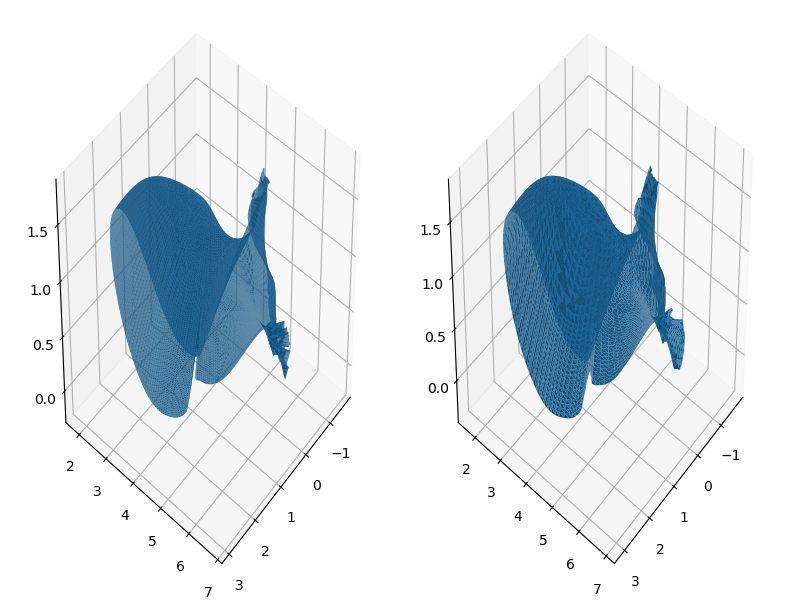

In [39]:
nm = 20
try:
    mf_old = np.load('manifolds_nu_linear_selfintersectcheck=True/{0:04d}_manifold_m.npy'.format(nm))[0]
    mf_new = np.load('manifolds_nu_cubic_selfintersectcheck=True/{0:04d}_manifold_m.npy'.format(nm))[0]
    fig = plt.figure(figsize=((8,6)))
    ax1 = fig.add_subplot(121,projection='3d')
    ax2 = fig.add_subplot(122,projection='3d')

    #nm = 0

    theta = 40
    phi = 40

    ax1.plot_trisurf(mf_new.xs, mf_new.ys, mf_new.zs, triangles = mf_new.triangulations)
    ax2.plot_trisurf(mf_old.xs, mf_old.ys, mf_old.zs, triangles = mf_old.triangulations)
    

    ax1.view_init(theta,phi)
    ax2.view_init(theta,phi)
    plt.tight_layout()
except (FileNotFoundError) as e:
    print('Elon Musk')
#fig = plt.figure(figsize=((8,6)))
#ax1 = fig.add_subplot(121,projection='3d')
#ax2 = fig.add_subplot(122,projection='3d')

#nm = 0

#theta = 40
#phi = 40

#ax1.plot_trisurf(mfs_selfintersectcheck_on[nm].xs,mfs_selfintersectcheck_on[nm].ys,mfs_selfintersectcheck_on[nm].zs,triangles=mfs_selfintersectcheck_on[nm].triangulations)
#ax2.plot_trisurf(mfs_selfintersectcheck_off[nm].xs,mfs_selfintersectcheck_off[nm].ys,mfs_selfintersectcheck_off[nm].zs,triangles=mfs_selfintersectcheck_off[nm].triangulations, color = 'r')

#ax1.view_init(theta,phi)
#ax2.view_init(theta,phi)
#plt.tight_layout()

In [ ]:
fig = plt.figure(figsize=((8,6)))
ax = fig.add_subplot(111,projection='3d')
ax.plot_trisurf(mfs_selfintersectcheck_on[nm].xs,mfs_selfintersectcheck_on[nm].ys,mfs_selfintersectcheck_on[nm].zs,triangles=mfs_selfintersectcheck_on[nm].triangulations)
plt.tight_layout()

<IPython.core.display.Javascript object>


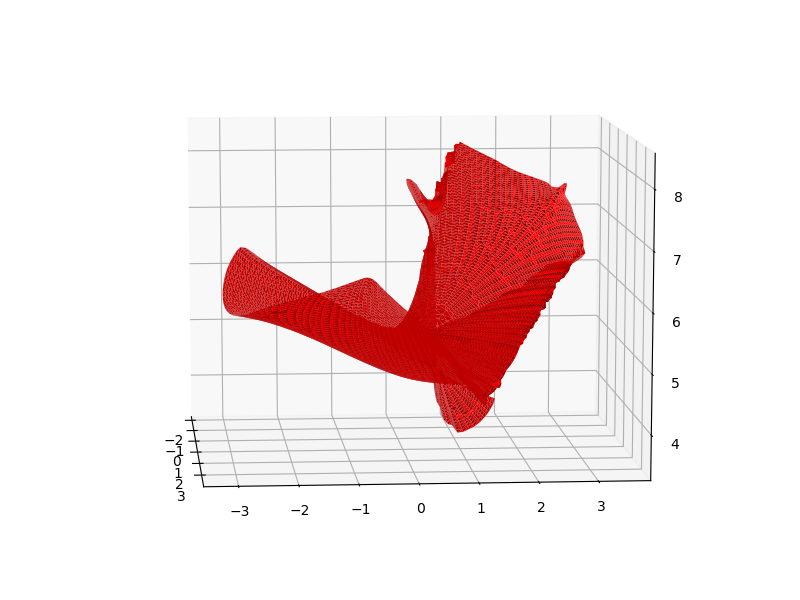

In [23]:
fig = plt.figure(figsize=((8,6)))
ax = fig.add_subplot(111,projection='3d')
ax.plot_trisurf(mfs_selfintersectcheck_off[nm].xs,mfs_selfintersectcheck_off[nm].ys,mfs_selfintersectcheck_off[nm].zs,triangles=mfs_selfintersectcheck_off[nm].triangulations, color = 'r')
plt.tight_layout()

In [82]:
#cm.viridis(vmin)

<IPython.core.display.Javascript object>


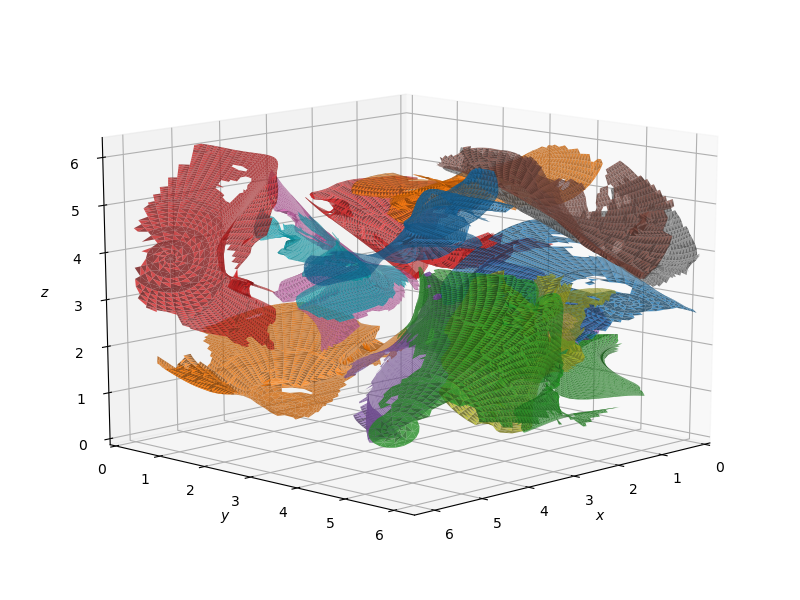

In [84]:
fig = plt.figure(figsize=((8,6)))
ax = fig.add_subplot(111,projection='3d')
#nm = 0
#cmap = mpl.cm.viridis
#norm = mpl.colors.Normalize(vmin = np.log(np.amin(lmi)+1),vmax=np.log(np.amax(lmi)+1))
cmap = mpl.cm.get_cmap('plasma')
norm = mpl.colors.Normalize(vmin=lm3_min,vmax=lm3_max)
#nm = 0
#cb1 = mpl.colorbar.ColorbarBase(ax,cmap=cmap,norm=norm)
#cb1.set_label('Hei')
nm = 10*2
#cmap = cm.veridis(vmin=np.amin(lmi),vmax=np.amax(lmi))
for l in LCSs[:]:
    #col = cmap(np.log(l.avg_lambda3+1),norm=norm)
    #if l.tot_weight > 10:
    clrval = conv2rgba(l.avg_lambda3)
    #clr = cmap(clrval)
    #X,Y = np.meshgrid()
    srf = ax.plot_trisurf(l.xs,l.ys,l.zs,triangles=l.triangulations,alpha=0.8)
    #srf2 = ax.plot_surface(np.asarray(l.xs),np.asarray(l.ys),np.asarray(l.zs))
    #if l.tot_weight > 10:
    #    ax.plot_trisurf(l.xs,l.ys,l.zs,triangles=l.triangulations)
    
#bar = fig.colorbar(srf)
    
ax.set_xlim(0,2*np.pi)
ax.set_ylim(0,2*np.pi)
ax.set_zlim(0,2*np.pi)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

theta = 20
phi = 40

ax.view_init(theta,phi)

plt.tight_layout()

In [1]:
X,Y = np.meshgrid(LCSs[0].xs,LCSs[0].ys)
Z = np.outer(np.asarray(LCSs[0].zs).T,LCSs[0].zs)
color_dimension = X
minn, maxx = color_dimension.min(), color_dimension.max()
norm = mpl.colors.Normalize(minn,maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
m.set_array([])

fcolors = m.to_rgba(color_dimension)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.canvas.show()

NameError: name 'np' is not defined

In [ ]:
ax.plot_trisurf?

In [ ]:
Z

In [51]:
mpl.colorbar.ColorbarBase?

In [33]:
lm3_lcss = []
for l in LCSs:
    lm3_lcss.append(l.avg_lambda3)

In [34]:
lm3_min, lm3_max = np.amin(lm3_lcss), np.amax(lm3_lcss)

In [26]:
def conv2rgba(lm):
    return ((lm+1)-(lm3_min+1))/((lm3_max+1)-(lm3_min+1))

In [16]:
li

[5.39734153127714,
 9.15821535729503,
 9.1333462454839,
 6.612769293310269,
 7.008711010700663,
 6.232682913505585,
 10.133655280971825,
 12.689280635935273,
 6.206615288575493,
 10.30954350192158,
 7.158066475019753,
 7.132424281791238,
 8.039529562474497,
 5.083853784090372,
 6.35458297248509,
 6.695706521022769,
 5.16432562463258,
 5.62638606491222,
 7.677159791193848,
 9.368045479987558,
 6.344000863984948,
 7.905456619714581,
 8.633536204410426,
 5.948830432805102,
 8.514969236317688,
 20.029341917154166,
 15.92671661991057,
 5.922107980756162,
 6.3287826222622545,
 9.786796251777973,
 5.987358021206629,
 8.527644043331275,
 26.411297104382946,
 14.096929327749928,
 6.049571970607911,
 19.860798093274045,
 8.839892736379722,
 7.23010917430868,
 7.188029242830502,
 6.624979755620071,
 7.800905736273235,
 9.816234808788707]

In [30]:
li = []
for l in LCSs[:]:
    li.append(l.tot_weight)

In [78]:
_ = np.asarray(lmi)

In [80]:
_.sort()

In [84]:
vars(LCSs[0].points[0])

{'pos': array([0.39423908, 1.57695631, 4.33662986]),
 'prev_vec': None,
 'tan_vec': None,
 'index': None,
 'in_ab': True,
 'lambda3': 20.21523617461751,
 'weight': 7.853981633975706e-07}

In [27]:
nmn = 7
lm_p = []
for p in LCSs[nmn].points:
    if  p.in_ab:
        lm_p.append(p.lambda3)

<IPython.core.display.Javascript object>


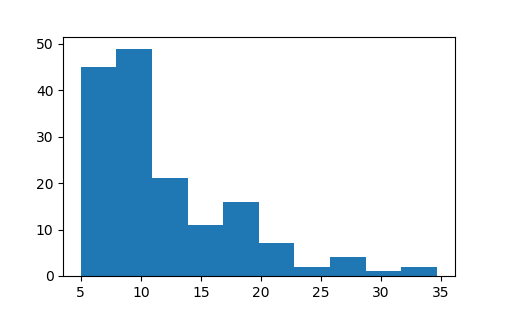

(array([45., 49., 21., 11., 16.,  7.,  2.,  4.,  1.,  2.]),
 array([ 5.0160249 ,  7.97846104, 10.94089718, 13.90333332, 16.86576946,
        19.8282056 , 22.79064174, 25.75307788, 28.71551402, 31.67795016,
        34.6403863 ]),
 <a list of 10 Patch objects>)

In [31]:
plt.figure()
plt.hist(li)

In [32]:
arr = np.asarray(lm_p)

In [33]:
arr = arr[np.argsort(arr)]

In [43]:
arr[5:-5].mean()/arr[4:-4].mean()

0.8576637886819132

In [33]:
cmap = mpl.cm.viridis

In [36]:
p = mpl.cm.get_cmap('viridis')

In [37]:
rgb

(0.282623, 0.140926, 0.457517, 1.0)

In [20]:
lmi = []
for l in LCSs[:]:
    lmi.append(l.avg_lambda3)

In [7]:
LCSs[0].avg_lambda3

656.7547241108745

<IPython.core.display.Javascript object>


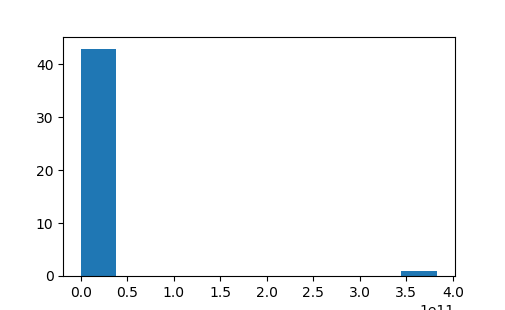

(array([43.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.45894360e+02, 3.82572559e+10, 7.65145117e+10, 1.14771767e+11,
        1.53029023e+11, 1.91286279e+11, 2.29543535e+11, 2.67800791e+11,
        3.06058046e+11, 3.44315302e+11, 3.82572558e+11]),
 <a list of 10 Patch objects>)

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(lmi)
#ax.set_xscale('log')

In [7]:
LCSs[7].tot_weight

13.844263514458191

In [20]:
xi1 = np.load('strain_prms_viljerun/xi1.npy')
xi2 = np.load('strain_prms_viljerun/xi2.npy')
xi3 = np.load('strain_prms_viljerun/xi3.npy')

x = np.load('strain_prms_viljerun/x.npy')
y = np.load('strain_prms_viljerun/y.npy')
z = np.load('strain_prms_viljerun/z.npy')

In [21]:
mf_cbc = np.load('./manifolds_cubic/0476_manifold_m.npy')[0]
mf_lin = np.load('./manifolds_linear/0476_manifold_m.npy')[0]


#mfm = np.load('./manifolds/0116_manifold_m.npy')[0]
#mfu = np.load('./manifolds/0116_manifold_u.npy')[0]
#mfd = np.load('./manifolds/0116_manifold_d.npy')[0]

In [67]:
xi1_itp_bspline = SplineEigenvectorInterpolator(x,y,z,xi1)
xi2_itp_bspline = SplineEigenvectorInterpolator(x,y,z,xi2)
xi3_itp_bspline = SplineEigenvectorInterpolator(x,y,z,xi3)

In [80]:
class RHS_ODEtrajectory:
    def __init__(self):
        pass
    
    def set_a(self,a):
        self.a = a
        self.b = np.sqrt(1-a**2)
    
    def set_pm(self,pm):
        self.pm = pm
        
    def __call__(self,t,x):
        return self.a*xi1_itp_bspline(x)+self.pm*self.b*xi2_itp_bspline(x)
    
class RHS_ODEtrajectory_2:
    def __init__(self):
        pass
    def set_tan_vec(self,a,pm,init_pos):
        self.vec = a*xi1_itp_bspline(init_pos) + pm*np.sqrt(1-a**2)*xi2_itp_bspline(init_pos)
    def set_prev_vec(self,v):
        self.prev_vec = v
    def __call__(self, t, x):
        v = np.cross(self.vec,xi3_itp_bspline(x))
        if np.dot(v,self.prev_vec) < 0:
            v = -v
        return v/np.linalg.norm(v)
        

In [83]:
def generate_trajectories(init_pos, t0, tf, h):
    _a = (np.arange(201)-100)/100
    _pm = [1,-1]
    
    func = RHS_ODEtrajectory_2()
    

    _p = []
    
    _strs = []
    
    for a in _a:

        #func.set_a(a)

        for pm in _pm:
            func.set_tan_vec(a,pm,init_pos)
            func.set_prev_vec(func.vec)
            #func.set_pm(pm)
            t = t0
            ps = [init_pos]
            _h = h
            p = ps[0]
            
            while t < tf:
                _h = min(_h,tf-t)
                v = func(t,p)
                t,p,_h = rk4(t,p,_h,func)
                func.set_prev_vec(v)
                ps.append(p)
            
            _p.append(np.asarray(ps))
            _strs.append('{:.3f}xi1{}{:.3f}xi2'.format(a,'+' if pm == 1 else '-',np.sqrt(1-a**2)))
            
    return _p, _strs

In [84]:
ps,strs = generate_trajectories(mf_cbc.input_params.init_pos, 0, 1.2, 0.01)
ps = np.asarray(ps)

In [85]:
mf_lin.geo_dist

1.1200000000000003

In [86]:
mf_cbc.geo_dist

1.6800000000000008

In [87]:
mf_cbc.set_xyzs()
mf_lin.set_xyzs()

<IPython.core.display.Javascript object>


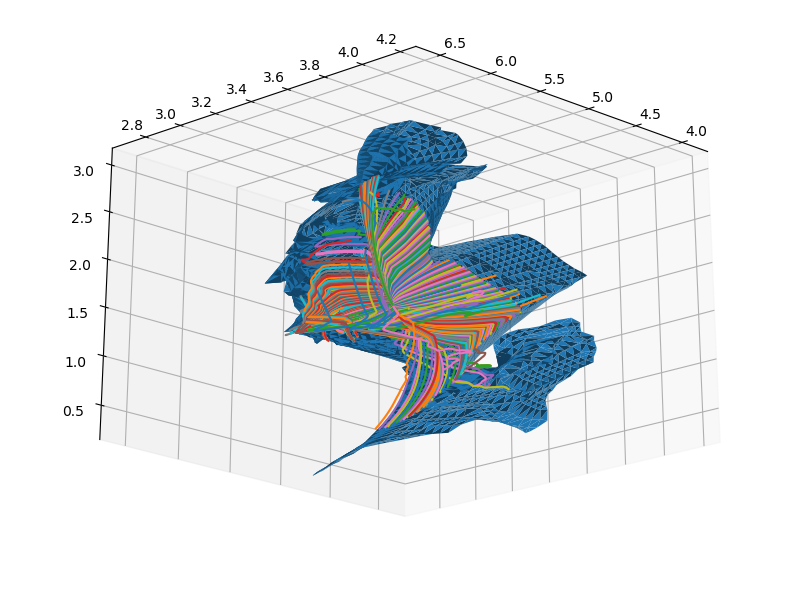

In [88]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111,projection='3d')
#ax2 = fig.add_subplot(122,projection='3d')

ax1.plot_trisurf(mf_cbc.xs, mf_cbc.ys, mf_cbc.zs, triangles = mf_cbc.triangulations)
#ax2.plot_trisurf(mfu.xs, mfu.ys, mfu.zs, triangles = mfu.triangulations)
#ax1.plot_trisurf(mf_lin.xs, mf_lin.ys, mf_lin.zs, triangles = mf_lin.triangulations)
for (ps_sq, s) in zip(ps,strs):
    ax1.plot(ps_sq[...,0],ps_sq[...,1],ps_sq[...,2],label=s)
 #   ax2.plot(ps_sq[...,0],ps_sq[...,1],ps_sq[...,2],label=s)

theta = 30
phi = -90

ax1.view_init(theta,phi)
#ax2.view_init(theta,phi)
plt.tight_layout()

In [10]:
def funkygibbons():
    q = np.load('lcss.npy')
    l = q[:2].copy()
    del q
    return l

def extract_stuff():
    LCSs = funkygibbons()
    x, y, z, triangs = [], [], [], []
    for l in LCSs:
        x.append(l.xs)
        y.append(l.ys)
        z.append(l.zs)
        triangs.append(l.triangulations)
    np.save('gx.npy',x)
    np.save('gy.npy',y)
    np.save('gz.npy',z)
    np.save('gt.npy',triangs)
    print('keklord')

In [11]:
LCSs = funkygibbons()

<IPython.core.display.Javascript object>


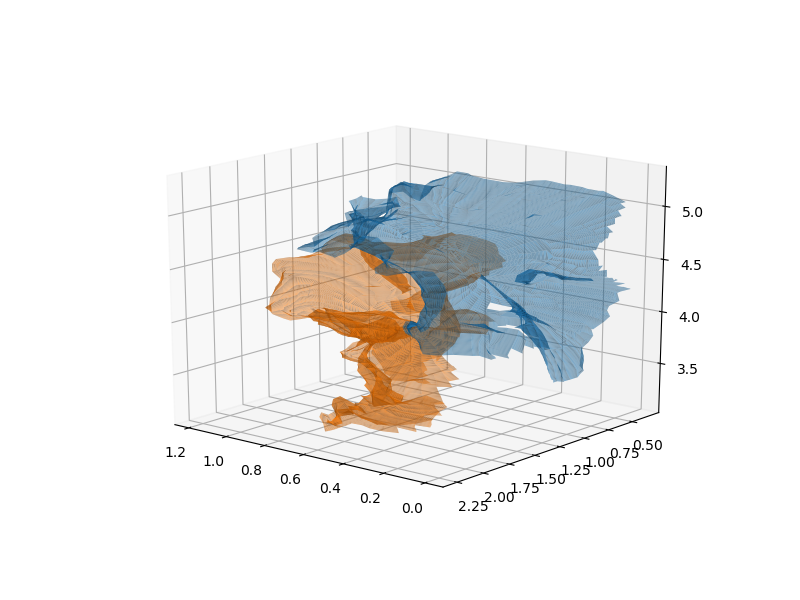

In [12]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111,projection='3d')

for l in LCSs:
    ax.plot_trisurf(l.xs, l.ys, l.zs, triangles = l.triangulations,alpha=0.55)



IndexError: index 11 is out of bounds for axis 0 with size 10

In [12]:
np.shape(LCSs[0].triangulations)

(12571, 3)